In [98]:
import pandas as pd
import seaborn as sns
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
%matplotlib inline

In [65]:
df_delivery = pd.read_csv('../data/delivery_geography.csv')
df_delivery.head()

,orderid,latitude,longitude,estimateddeliverytime
0,1552679,37.697073,-122.485903,259.0
1,1552697,37.782185,-122.454544,54.0
2,1552675,37.780840,-122.395820,228.0
3,1552934,37.783131,-122.388962,209.0
4,1552983,37.323786,-121.878904,345.0


In [66]:
'Number of rows in df_delivery: {}'.format(len(df_delivery))

'Number of rows in df_delivery: 3780'

'Average estimated delivery time: 227 s with a median of 150 s'

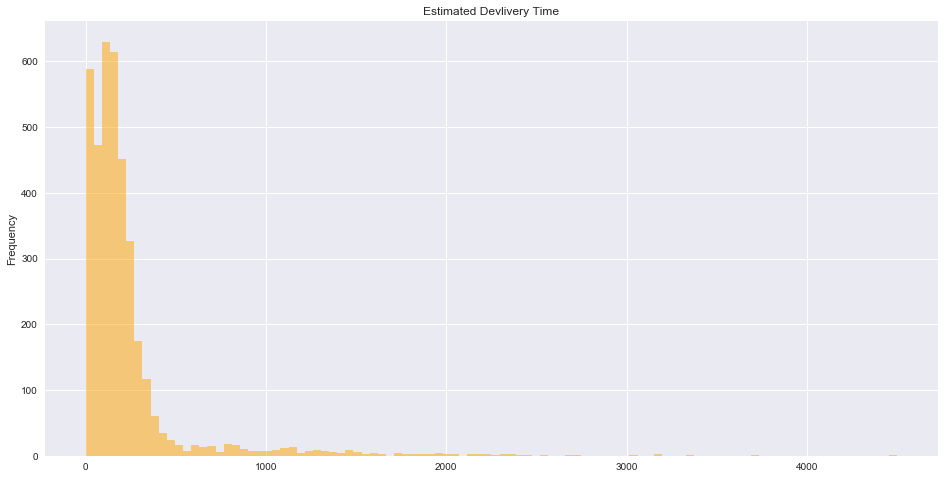

In [67]:
df_delivery.estimateddeliverytime.plot.hist(
    alpha=.5, color='orange', bins=100,  figsize=(16, 8),title ='Estimated Devlivery Time')
'Average estimated delivery time: {} s with a median of {} s'.format(
    "%.0f" % df_delivery['estimateddeliverytime'].mean(), "%.0f" % df_delivery['estimateddeliverytime'].median())

In [68]:
df_prices = pd.read_csv('../data/delivery_prices.csv')
df_prices.head()

,orderid,deliveredat,totalprice
0,1552553,2017-08-08T00:02:29.980+00:00,176.11
1,1552559,2017-08-08T00:09:06.077+00:00,71.03
2,1552499,2017-08-08T00:15:03.847+00:00,61.95
3,1552617,2017-08-08T00:16:40.820+00:00,62.40
4,1552632,2017-08-08T00:31:27.957+00:00,64.16


In [69]:
'Number of rows in df_prices: {}'.format(len(df_prices))

'Number of rows in df_prices: 3352'

'Average total price $69 with a median of $55'

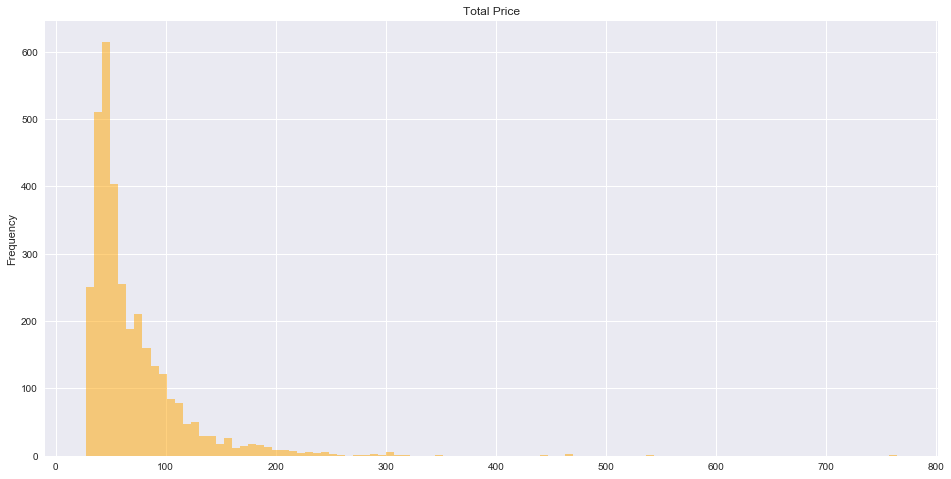

In [70]:
df_prices.totalprice.plot.hist(
    alpha=.5, color='orange', bins=100,  figsize=(16, 8), title ='Total Price')
'Average total price ${} with a median of ${}'.format(
    "%.0f" % df_prices.totalprice.mean(), "%.0f" % df_prices.totalprice.median())

## 1. Join these tables in a meaningful way 
Below I'll join the tables with merge on order id. It should be noted that the tables are not of equal size, thus some of the features (columns) will have missing values


Since the tables are not of equal length we know there will be 428 rows with missing values, calculated below

In [71]:
'Number of incomplete rows: {}'.format(len(df_delivery) - len(df_prices))

'Number of incomplete rows: 428'

In [72]:
# Change the index to 'orderid' column
df_prices = df_prices.set_index('orderid')
df_delivery = df_delivery.set_index('orderid')

In [97]:
# Merge on 'oderid' column
df_join = pd.merge(df_prices,df_delivery, how='outer', left_index=True, right_index=True)
df_join.columns =['date','price','lat','lon','delivery time'] #rename columns
df_join[1020:1025]  #sample of table values 

,date,price,lat,lon,delivery time
orderid,,,,,
1553535,NaN,NaN,34.012453,-118.457838,1077.0
1553536,2017-08-08T02:26:01.213+00:00,43.73,37.779351,-122.497121,235.0
1553537,2017-08-08T02:30:57.383+00:00,137.47,37.807403,-122.301621,172.0
1553538,2017-08-08T02:38:09.680+00:00,56.94,37.748804,-122.423628,20.0
1553539,2017-08-08T03:30:50.513+00:00,65.22,37.485039,-122.192457,119.0


# 2. Find at least one source of external information that you think would augment this table well and add it into the joined table.

- Using the uszipcode 0.1.3 python package I can look up the zipcode, city, and average income for each latitude, longitude entry

Note: I'm not sure how accurate the aveage income values are. Regardless, this information would be a good metric to know for market exploration purposes.


In [110]:
res = search.by_coordinate(37.807403, -122.301621, radius=1, returns=1)

In [111]:
res[0]['Zipcode']

'94607'

In [112]:
res[0]['Wealthy']

14127.218352149892

In [113]:
res[0]['City']

'Oakland'

In [143]:
df_delivery[10:60].apply(lambda x: search.by_coordinate( 37.807403,  -122.301621, radius=1, returns=1)[0]['Zipcode'],axis=1)

orderid
1553155    94607
1553212    94607
1553370    94607
1553357    94607
1553156    94607
1553374    94607
1553407    94607
1553438    94607
1553415    94607
1553348    94607
1553617    94607
1553605    94607
1553695    94607
1553572    94607
1553520    94607
1553484    94607
1553682    94607
1553639    94607
1553782    94607
1553759    94607
1553640    94607
1553697    94607
1553845    94607
1553953    94607
1554053    94607
1553903    94607
1554075    94607
1554097    94607
1554268    94607
1554160    94607
1554354    94607
1554311    94607
1554528    94607
1554531    94607
1554532    94607
1554640    94607
1554582    94607
1554815    94607
1554710    94607
1554857    94607
1554511    94607
1554809    94607
1554839    94607
1554899    94607
1554852    94607
1554962    94607
1555025    94607
1555143    94607
1555058    94607
1555138    94607
dtype: object

In [126]:
df_delivery[0:10]

,latitude,longitude,estimateddeliverytime
orderid,,,
1552679,37.697073,-122.485903,259.0
1552697,37.782185,-122.454544,54.0
1552675,37.780840,-122.395820,228.0
1552934,37.783131,-122.388962,209.0
1552983,37.323786,-121.878904,345.0
1552998,37.773666,-122.278450,0.0
1553031,37.754259,-122.398962,18.0
1552980,37.378558,-122.125420,105.0
1553119,36.963017,-121.881974,2327.0


In [120]:
search.by_coordinate(37.747289, -122.419485, radius=1, returns=1)[0]['Zipcode']

'94110'